### author by yangshichen
### 注意：脚本仅供参考，使用前请仔细阅读

In [9]:
library(ggplot2)
library(future)
library(tidyverse)
library(ggpubr)
library(ggchicklet)
library(ggsci)
library(magrittr)
library(ggh4x)
library(rstatix)
library(ggsignif)
library(ggnewscale)
library(patchwork)
library(gapminder)
library(ggprism)
library(dplyr)
library(ggplotify)
library(readr)
library(arrow)
library(ggbreak)
library(lme4)
library(Matrix)
library(lmtest)
library(pbmcapply)
library(data.table)
library(arrow)
library(Seurat)
library(UpSetR)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

载入程序包：‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



载入程序包：‘rstatix’


The following object is masked from ‘package:stats’:

    filter



载入程序包：‘arrow’


The following object is masked from ‘package:magrittr’:

    is_in


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp


ggbreak v0.1.5 Learn more 

In [10]:
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6, angle = 30,hjust = 1,vjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


### 细胞状态小提琴图

In [44]:
module <- read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/数据导出/CD4/CD4-Inflammatory Module.csv")
colnames(module)[5] <- 'Inflammatory_Module'
#module <- module[,c(3,4,5)]
module$stage <- factor(module$stage, levels = c('HDs','IRs','INRs'))
module$Inflammatory_Module <- as.numeric(scale(module$Inflammatory_Module))
module 

cellbarcode,sample,stage,celltype_L3,Inflammatory_Module
<chr>,<chr>,<fct>,<chr>,<dbl>
HD-H134-1-CELL4_N1,HD-H134,HDs,CD4_Treg-FOXP3,0.50627728
HD-H134-1-CELL24_N1,HD-H134,HDs,CD4_Naive_T-CCR7,-1.14633473
HD-H134-1-CELL55_N1,HD-H134,HDs,CD4_Treg-FOXP3,1.49216904
HD-H134-1-CELL85_N1,HD-H134,HDs,CD4_Tcm-CXCR5,-0.67723837
HD-H134-1-CELL101_N2,HD-H134,HDs,CD4_Th22-CCR10,0.37316183
HD-H134-1-CELL103_N1,HD-H134,HDs,CD4_Naive_T-CCR7,-0.77084085
HD-H134-1-CELL104_N1,HD-H134,HDs,CD4_Naive_T-CCR7,-0.23902007
HD-H134-1-CELL172_N1,HD-H134,HDs,CD4_Treg-FOXP3,0.22583384
HD-H134-1-CELL175_N2,HD-H134,HDs,CD4_Th1-GZMK,1.54079479


In [45]:
module <- module %>%
  group_by(sample, celltype_L3,stage) %>%
  summarise(Inflammatory_Module = mean(Inflammatory_Module, na.rm = TRUE)) %>%
  ungroup()
module

`summarise()` has grouped output by 'sample', 'celltype_L3'. You can override
using the `.groups` argument.


sample,celltype_L3,stage,Inflammatory_Module
<chr>,<chr>,<fct>,<dbl>
HD-H134,CD4_Naive_T-CCR7,HDs,-0.59520539
HD-H134,CD4_Naive_T-SOX4,HDs,-0.81570508
HD-H134,CD4_Tcm-CXCR5,HDs,-0.41724670
HD-H134,CD4_Tcm-GPR183,HDs,-0.11600435
HD-H134,CD4_Tcm-IFIT3,HDs,0.28936250
HD-H134,CD4_Tcm-SOX4,HDs,-0.41600991
HD-H134,CD4_Tem-CCR7neg,HDs,-0.15509291
HD-H134,CD4_Tfh_like-CXCR5,HDs,0.10954595
HD-H134,CD4_Th-TNFRSF11A,HDs,0.21761004


In [50]:
celltypes <- unique(module$celltype_L3)
for (ct in celltypes) {
  df <- module %>% filter(celltype_L3 == ct)
  p <- ggplot(df, aes(x = stage, y = Inflammatory_Module, fill = stage)) +
    geom_violin(trim = FALSE, scale = "width",alpha = 0.5) +
    geom_jitter(aes(color = stage), size = 1.5, position = position_jitter(width = 0.3, height = 0), alpha = 0.75) +
    scale_color_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) +
    geom_boxplot(width = 0.3, outlier.shape = NA, alpha = 0.5)  +
    scale_fill_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) +
    mytheme
  
    ggsave(filename = paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/Integrative_analysis/Cellstate/', ct, '_violin.pdf'),
         plot = p, width = 4, height = 4)
}

### TF 活性

In [52]:
TF <- read.delim("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/Integrative_analysis/TF/tf_to_gene_adj.tsv", 
                 header = TRUE, sep = "\t", stringsAsFactors = FALSE)
TF

TF,target,importance,regulation,rho
<chr>,<chr>,<dbl>,<int>,<dbl>
ACAA1,GNA14-AS1,0.005001280,0,-2.052467e-03
ACAA1,LYST-AS1,0.341466855,0,-9.917838e-03
ACAA1,MRPL33,0.051252337,0,-3.590407e-05
ACAA1,ZBTB33,0.014836863,0,-6.788440e-03
ACAA1,TTLL10-AS1,0.021602075,0,-9.645174e-04
ACAA1,JAML,0.028511855,1,1.217414e-01
ACAA1,OOSP4B,0.021603261,0,-2.492813e-04
ACAA1,ATP2C2,0.751282623,0,-1.224675e-03
ACAA1,UBE2D3,0.051198547,1,3.482878e-02


In [55]:
TF_sub <- subset(TF, target %in% 'OAS3' & regulation > 0)
TF_sub

,TF,target,importance,regulation,rho
,<chr>,<chr>,<dbl>,<int>,<dbl>
108163,BATF2,OAS3,0.143266802,1,0.12289156
113318,BATF3,OAS3,0.977224791,1,0.21793296
133877,BCL11B,OAS3,0.297690254,1,0.05009668
189241,CEBPA,OAS3,0.058376594,1,0.13743194
202280,CEBPB,OAS3,0.336853948,1,0.15159839
216524,CEBPD,OAS3,0.110679113,1,0.09978631
272732,CREBL2,OAS3,0.054542894,1,0.12708938
296420,CUX1,OAS3,0.086738684,1,0.13662087
311761,DRAP1,OAS3,0.908861142,1,0.14700241


In [60]:
TFs <- TF_sub$TF
TFs

[1] "BATF2"  "BATF3"  "BCL11B" "CEBPA"  "CEBPB"  "CEBPD"  "CREBL2" "CUX1"  
 [9] "DRAP1"  "E2F1"   "E2F3"   "ETS2"   "ETV6"   "ETV7"   "FOS"    "HES4"  
[17] "IRF5"   "IRF7"   "ISL2"   "KLF11"  "KLF3"   "KLF4"   "LEF1"   "LMO2"  
[25] "LYL1"   "MAF"    "MAFB"   "MBD2"   "PLAGL2" "PML"    "RARA"   "RORC"  
[33] "RUNX2"  "RXRA"   "SMAD1"  "SPI1"   "STAT1"  "STAT2"  "STAT3"  "STAT5B"
[41] "TCF7"   "TCF7L2" "VDR"    "YBX1"   "ZBTB7A" "ZBTB7B"

In [62]:
TFscore <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Scenic/58TFs.csv"))
TFscore <- subset(TFscore, celltype_L3 %in% 'CD4-Naive-T-CCR7')
colnames(TFscore) <- sub("_.*", "", colnames(TFscore))
TFscore

,scRNA,scATAC,celltype,stage,celltype.1,celltype.2,Cell,ASCL2,ATF3,ATF7,⋯,STAT2,TCF12,TFEB,USF2,VPS4B,ZBTB21,ZBTB2,ZEB2,ZNF267,ZNF37A
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
445,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7,HDs,CD4-Naive-T-CCR7,CD4+ T,CD4-Naive-T-CCR7-HDs_0,0.05187399,0.06335304,0.0008139787,⋯,0.0117712177,0.028956540,0.0000000000,0.0030786064,0.000000000,0.09517010,0.0000000000,0.01894486,0.000000000,0.12872079
446,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7,HDs,CD4-Naive-T-CCR7,CD4+ T,CD4-Naive-T-CCR7-HDs_1,0.07426580,0.05069355,0.0000000000,⋯,0.0078843788,0.045664207,0.0059778598,0.0078520553,0.000000000,0.07222110,0.0000000000,0.02691320,0.000000000,0.10442804
447,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7,HDs,CD4-Naive-T-CCR7,CD4+ T,CD4-Naive-T-CCR7-HDs_2,0.06096947,0.05708443,0.0000000000,⋯,0.0111808118,0.046074211,0.0002029520,0.0077555136,0.000000000,0.05584340,0.0000000000,0.02461362,0.012730627,0.09421894
448,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7,HDs,CD4-Naive-T-CCR7,CD4+ T,CD4-Naive-T-CCR7-HDs_3,0.07072825,0.07595696,0.0196440200,⋯,0.0118204182,0.057093071,0.0000000000,0.0048699906,0.000000000,0.09763433,0.0000000000,0.03775603,0.033333333,0.09612546
449,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7,HDs,CD4-Naive-T-CCR7,CD4+ T,CD4-Naive-T-CCR7-HDs_4,0.05829343,0.06843240,0.0417842414,⋯,0.0140098401,0.071135711,0.0000000000,0.0046232730,0.000000000,0.08977405,0.0000000000,0.03327718,0.002214022,0.10953260
450,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7,HDs,CD4-Naive-T-CCR7,CD4+ T,CD4-Naive-T-CCR7-HDs_5,0.07038517,0.04743698,0.0075971348,⋯,0.0172693727,0.032492825,0.0041697417,0.0058246803,0.012844167,0.08295001,0.0000000000,0.02401198,0.000000000,0.06740467
451,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7,HDs,CD4-Naive-T-CCR7,CD4+ T,CD4-Naive-T-CCR7-HDs_6,0.06107621,0.07863558,0.0115042327,⋯,0.0093972940,0.023831488,0.0000000000,0.0033682314,0.000000000,0.09202345,0.0000000000,0.03353120,0.000000000,0.10233702
452,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7,HDs,CD4-Naive-T-CCR7,CD4+ T,CD4-Naive-T-CCR7-HDs_7,0.04454728,0.06984395,0.0238224441,⋯,0.0000000000,0.035157852,0.0004243542,0.0043765554,0.000000000,0.08828287,0.0000000000,0.02730093,0.026752768,0.09538745
453,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7-HDs,CD4-Naive-T-CCR7,HDs,CD4-Naive-T-CCR7,CD4+ T,CD4-Naive-T-CCR7-HDs_8,0.04936568,0.06971058,0.0373344910,⋯,0.0070233702,0.047662977,0.0000000000,0.0000000000,0.019727505,0.09305970,0.0033352257,0.02509492,0.022816728,0.08154982


In [63]:
keep_cols <- c("stage", "Cell", TFs)
keep_cols <- intersect(keep_cols, colnames(TFscore))
TFscore <- TFscore[, keep_cols, drop = FALSE]
TFscore

,stage,Cell,CEBPA,CEBPB,CEBPD,ETV7,IRF5,KLF4,LYL1,RARA,RXRA,SPI1,STAT1,STAT2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
445,HDs,CD4-Naive-T-CCR7-HDs_0,0.03356166,0.03729094,0.03653806,0.024907749,0.03448557,0.03614810,0.010714774,0.04652082,0.03363962,0.02886895,0.06503267,0.0117712177
446,HDs,CD4-Naive-T-CCR7-HDs_1,0.03254966,0.03858654,0.03661722,0.018962690,0.04079933,0.03267086,0.012662293,0.04188192,0.02848270,0.02895323,0.07859102,0.0078843788
447,HDs,CD4-Naive-T-CCR7-HDs_2,0.03740637,0.04303148,0.04338432,0.032287823,0.04169199,0.03877184,0.016509498,0.05299815,0.03523255,0.03172259,0.07354684,0.0111808118
448,HDs,CD4-Naive-T-CCR7-HDs_3,0.03396160,0.03827757,0.03945681,0.034799098,0.03557358,0.03731906,0.013557469,0.04348313,0.03192795,0.02799957,0.07564576,0.0118204182
449,HDs,CD4-Naive-T-CCR7-HDs_4,0.03388205,0.03510053,0.03625695,0.038822263,0.03179130,0.03486441,0.010530272,0.04721929,0.03193526,0.02921707,0.08284810,0.0140098401
450,HDs,CD4-Naive-T-CCR7-HDs_5,0.04023797,0.04178981,0.04105623,0.010121976,0.04213154,0.03883741,0.014069974,0.04620453,0.04124804,0.03046296,0.06586208,0.0172693727
451,HDs,CD4-Naive-T-CCR7-HDs_6,0.03124931,0.03292323,0.03961512,0.031724067,0.03794226,0.03418920,0.011015443,0.04343701,0.03195718,0.02776963,0.08064762,0.0093972940
452,HDs,CD4-Naive-T-CCR7-HDs_7,0.03756656,0.04048402,0.04018751,0.033107831,0.03777675,0.03730641,0.013550636,0.04300211,0.03674692,0.02848877,0.07641592,0.0000000000
453,HDs,CD4-Naive-T-CCR7-HDs_8,0.02807521,0.02789097,0.03102736,0.005740057,0.02447634,0.02992059,0.007824245,0.04076173,0.02784334,0.02481156,0.05583297,0.0070233702


In [69]:
tf <- colnames(TFscore)[3:14]
for (ct in tf) {
    df <- TFscore[, c(colnames(TFscore)[1:2], ct)]
    df$stage <- factor(df$stage, levels = c('HDs','IRs','INRs'))
    p <- ggplot(df, aes(x = df[,1], y = df[,3], fill = stage)) +
    geom_violin(trim = FALSE, scale = "width",alpha = 0.5) +
    scale_color_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) +
    geom_boxplot(width = 0.3, outlier.shape = NA, alpha = 0.5)  +
    scale_fill_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) +
    mytheme
  
    ggsave(filename = paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/Integrative_analysis/TF/', ct, '_violin.pdf'),
         plot = p, width = 4, height = 4)
}

### TF 对应 Gene 表达

In [71]:
TFgene <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/Integrative_analysis/TF/tf_gene_expression.csv"))
TFgene

cellbarcode,CEBPA,CEBPB,CEBPD,ETV7,IRF5,KLF4,LYL1,RARA,RXRA,SPI1,STAT1,STAT2,stage,sample
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HD-H134-1-CELL24_N1,-0.08595175,-0.2790848,-0.1211742,-0.0744554,-0.1180104,-0.1303213,-0.1399963,-0.1885672,-0.1777165,-0.07195771,-0.6868775,-0.3009851,HDs,HD-H134
HD-H134-1-CELL103_N1,-0.08595175,-0.2790848,-0.1211742,-0.0744554,-0.1180104,-0.1303213,-0.1399963,-0.1885672,-0.1777165,-0.07195771,-0.6868775,-0.3009851,HDs,HD-H134
HD-H134-1-CELL104_N1,-0.08595175,-0.2790848,-0.1211742,-0.0744554,-0.1180104,-0.1303213,-0.1399963,-0.1885672,-0.1777165,-0.07195771,2.4270190,-0.3009851,HDs,HD-H134
HD-H134-1-CELL180_N1,-0.08595175,-0.2790848,-0.1211742,-0.0744554,-0.1180104,-0.1303213,-0.1399963,-0.1885672,-0.1777165,-0.07195771,-0.6868775,-0.3009851,HDs,HD-H134
HD-H134-1-CELL287_N1,-0.08595175,-0.2790848,-0.1211742,-0.0744554,-0.1180104,-0.1303213,-0.1399963,-0.1885672,-0.1777165,-0.07195771,-0.6868775,-0.3009851,HDs,HD-H134
HD-H134-1-CELL319_N1,-0.08595175,-0.2790848,-0.1211742,-0.0744554,-0.1180104,-0.1303213,-0.1399963,-0.1885672,-0.1777165,-0.07195771,1.6028220,-0.3009851,HDs,HD-H134
HD-H134-1-CELL434_N1,-0.08595175,-0.2790848,-0.1211742,-0.0744554,-0.1180104,-0.1303213,-0.1399963,-0.1885672,-0.1777165,-0.07195771,1.5693333,-0.3009851,HDs,HD-H134
HD-H134-1-CELL495_N2,-0.08595175,-0.2790848,-0.1211742,-0.0744554,-0.1180104,-0.1303213,-0.1399963,-0.1885672,-0.1777165,-0.07195771,0.5526042,-0.3009851,HDs,HD-H134
HD-H134-1-CELL503_N2,-0.08595175,-0.2790848,-0.1211742,-0.0744554,-0.1180104,-0.1303213,-0.1399963,-0.1885672,-0.1777165,-0.07195771,-0.6868775,3.3588650,HDs,HD-H134


In [80]:
tf <- colnames(TFgene)[2:13]
for (ct in tf) {
    df <- TFgene[, c(colnames(TFgene)[14:15], ct)]
    df$stage <- factor(df$stage, levels = c('HDs','IRs','INRs'))
    p <- ggplot(df, aes(x = df[,1], y = df[,3], fill = stage)) +
    geom_violin(trim = FALSE, scale = "width",alpha = 0.5) +
    scale_color_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) +
    geom_boxplot(width = 0.3, outlier.shape = NA, alpha = 0.5)  +
    scale_fill_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) +
    mytheme
  
    ggsave(filename = paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/Integrative_analysis/TF/', ct, 'gene_violin.pdf'),
         plot = p, width = 4, height = 4)
}

In [81]:
df

,stage,sample,STAT2
,<fct>,<chr>,<dbl>
9,HDs,HD-H134,3.358865
18,HDs,HD-H134,2.547070
36,HDs,HD-H134,2.936260
47,HDs,HD-H134,2.513483
78,HDs,HD-H134,3.463688
89,HDs,HD-H134,2.739869
92,HDs,HD-H134,3.918845
101,HDs,HD-H134,4.078785
116,HDs,HD-H134,2.937581


In [85]:
df_summary <- df %>%
  group_by(sample, stage) %>%
  summarise(mean_expr = mean(STAT2, na.rm = TRUE)) %>%
  ungroup()
df_summary

`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.


sample,stage,mean_expr
<chr>,<fct>,<dbl>
HD-H134,HDs,3.413235
HD-H135,HDs,3.328279
HD-H136,HDs,3.610473
HD-H137,HDs,3.375130
HD-H138,HDs,3.174946
HD-H140,HDs,3.154120
HD-H141,HDs,3.094401
HD-H143,HDs,3.133731
HD-H145,HDs,3.141066


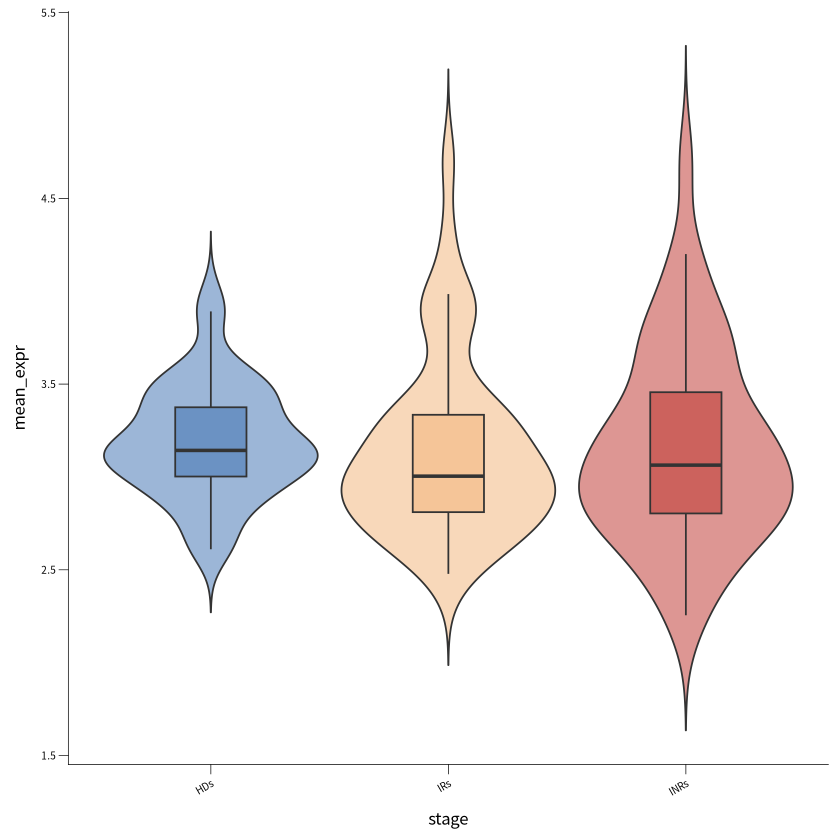

In [90]:
p <- ggplot(df_summary, aes(x = stage, y = mean_expr, fill = stage)) +
    geom_violin(trim = FALSE, scale = "width",alpha = 0.5) +
    scale_color_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) +
    geom_boxplot(width = 0.3, outlier.shape = NA, alpha = 0.5)  +
    scale_fill_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) +
    mytheme
p

### TF 活性和细胞状态表达相关

In [107]:
TFgene <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/Integrative_analysis/TF/tf_gene_expression2.csv"))
TFgene

cellbarcode,CEBPA,CEBPB,CEBPD,ETV7,IRF5,KLF4,LYL1,RARA,RXRA,SPI1,STAT1,STAT2,stage,sample
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
HD-H134-1-CELL24_N1,0,0,0,0,0,0,0,0,0,0,0,0,HDs,HD-H134
HD-H134-1-CELL103_N1,0,0,0,0,0,0,0,0,0,0,0,0,HDs,HD-H134
HD-H134-1-CELL104_N1,0,0,0,0,0,0,0,0,0,0,3,0,HDs,HD-H134
HD-H134-1-CELL180_N1,0,0,0,0,0,0,0,0,0,0,0,0,HDs,HD-H134
HD-H134-1-CELL287_N1,0,0,0,0,0,0,0,0,0,0,0,0,HDs,HD-H134
HD-H134-1-CELL319_N1,0,0,0,0,0,0,0,0,0,0,1,0,HDs,HD-H134
HD-H134-1-CELL434_N1,0,0,0,0,0,0,0,0,0,0,1,0,HDs,HD-H134
HD-H134-1-CELL495_N2,0,0,0,0,0,0,0,0,0,0,1,0,HDs,HD-H134
HD-H134-1-CELL503_N2,0,0,0,0,0,0,0,0,0,0,0,1,HDs,HD-H134


In [108]:
module <- as.data.frame(read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/数据导出/CD4/CD4-Inflammatory Module.csv'))
module <- subset(module, celltype_L3 %in% 'CD4_Naive_T-CCR7')
module

,cellbarcode,sample,stage,celltype_L3,Inflammatory.Module
,<chr>,<chr>,<chr>,<chr>,<dbl>
2,HD-H134-1-CELL24_N1,HD-H134,HDs,CD4_Naive_T-CCR7,0.05029802
6,HD-H134-1-CELL103_N1,HD-H134,HDs,CD4_Naive_T-CCR7,0.07469356
7,HD-H134-1-CELL104_N1,HD-H134,HDs,CD4_Naive_T-CCR7,0.10924555
10,HD-H134-1-CELL180_N1,HD-H134,HDs,CD4_Naive_T-CCR7,0.12015369
18,HD-H134-1-CELL287_N1,HD-H134,HDs,CD4_Naive_T-CCR7,0.09027806
19,HD-H134-1-CELL319_N1,HD-H134,HDs,CD4_Naive_T-CCR7,0.04680001
26,HD-H134-1-CELL434_N1,HD-H134,HDs,CD4_Naive_T-CCR7,0.09905062
30,HD-H134-1-CELL495_N2,HD-H134,HDs,CD4_Naive_T-CCR7,0.16927808
31,HD-H134-1-CELL503_N2,HD-H134,HDs,CD4_Naive_T-CCR7,0.02129568


In [109]:
data <- merge(TFgene,module,by='cellbarcode')
data

cellbarcode,CEBPA,CEBPB,CEBPD,ETV7,IRF5,KLF4,LYL1,RARA,RXRA,SPI1,STAT1,STAT2,stage.x,sample.x,sample.y,stage.y,celltype_L3,Inflammatory.Module
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
HD-H134-1-CELL10001_N1,0,1,0,0,0,0,0,0,0,0,1,0,HDs,HD-H134,HD-H134,HDs,CD4_Naive_T-CCR7,0.182267414
HD-H134-1-CELL10003_N1,0,0,0,0,0,0,0,0,0,0,0,0,HDs,HD-H134,HD-H134,HDs,CD4_Naive_T-CCR7,0.079950955
HD-H134-1-CELL10016_N1,0,0,0,0,0,0,0,1,0,0,0,0,HDs,HD-H134,HD-H134,HDs,CD4_Naive_T-CCR7,0.074561346
HD-H134-1-CELL10018_N1,0,0,0,0,0,0,0,0,0,0,0,0,HDs,HD-H134,HD-H134,HDs,CD4_Naive_T-CCR7,0.125863933
HD-H134-1-CELL10027_N1,0,0,0,0,0,0,0,0,0,0,0,0,HDs,HD-H134,HD-H134,HDs,CD4_Naive_T-CCR7,0.074043054
HD-H134-1-CELL10037_N1,0,0,0,0,0,0,0,0,0,0,0,0,HDs,HD-H134,HD-H134,HDs,CD4_Naive_T-CCR7,0.078283623
HD-H134-1-CELL10038_N1,0,1,0,0,0,0,0,0,0,0,2,0,HDs,HD-H134,HD-H134,HDs,CD4_Naive_T-CCR7,0.093464117
HD-H134-1-CELL10053_N1,0,0,0,0,0,0,0,0,0,0,0,0,HDs,HD-H134,HD-H134,HDs,CD4_Naive_T-CCR7,-0.002989646
HD-H134-1-CELL10060_N1,0,0,0,0,0,0,0,0,0,0,0,0,HDs,HD-H134,HD-H134,HDs,CD4_Naive_T-CCR7,0.095768221


In [113]:
df_summary <- data %>%
  group_by(sample.x,stage.x) %>%
  summarise(STAT1 = mean(STAT1, na.rm = TRUE),
           Inflammatory.Module = mean(Inflammatory.Module, na.rm = TRUE)) %>%
  ungroup()
df_summary

`summarise()` has grouped output by 'sample.x'. You can override using the
`.groups` argument.


sample.x,stage.x,STAT1,Inflammatory.Module
<chr>,<chr>,<dbl>,<dbl>
HD-H134,HDs,0.9368421,0.08610446
HD-H135,HDs,0.4595628,0.09147373
HD-H136,HDs,0.4564299,0.07869509
HD-H137,HDs,0.3299145,0.07293871
HD-H138,HDs,1.0295620,0.08686275
HD-H140,HDs,0.4427374,0.10406738
HD-H141,HDs,0.7469099,0.10186393
HD-H143,HDs,0.7656250,0.10440815
HD-H145,HDs,0.7317518,0.10081963


In [114]:
cor(df_summary$STAT1, df_summary$Inflammatory.Module, use = "complete.obs", method = "pearson")

[1] 0.4653719

In [115]:
cor.test(df_summary$STAT1, df_summary$Inflammatory.Module, method = "pearson") 


	Pearson's product-moment correlation

data:  df_summary$STAT1 and df_summary$Inflammatory.Module
t = 6.2211, df = 140, p-value = 5.368e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3256054 0.5852354
sample estimates:
      cor 
0.4653719 


`geom_smooth()` using formula = 'y ~ x'


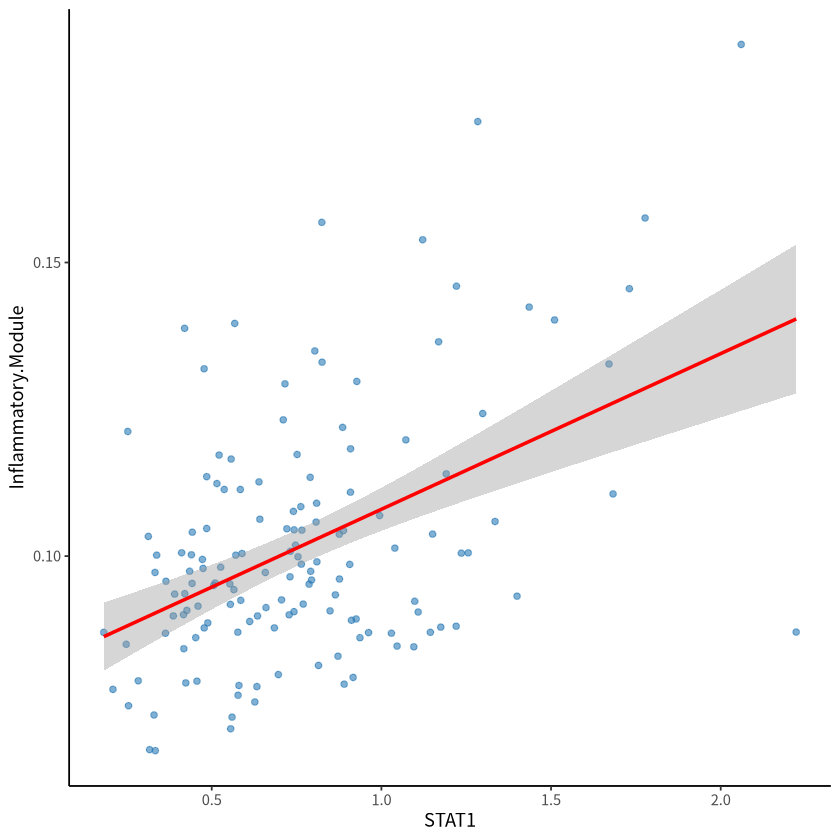

In [117]:
p <- ggplot(df_summary, aes(x = STAT1, y = Inflammatory.Module)) +
  geom_point(alpha = 0.6, color = "#2C7BB6") +   # 散点
  geom_smooth(method = "lm", se = TRUE, color = "red") +  # 回归线
  theme_classic()

p

In [118]:
ggsave('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/Integrative_analysis/TF/cor.pdf',p)

Saving 7 x 7 in image
`geom_smooth()` using formula = 'y ~ x'


### MEME-FIMO

#### Step 1. 准备 eSNP 位点文件 rs2701615 12:113039824-G>T

In [ ]:
chr12    113039824    rs2701615 

#### Step 2. 生成 BED 文件（0-based 坐标）

In [ ]:
awk 'BEGIN{OFS="\t"} {start=$2-16; end=$2+15; if(start<0) start=0; print $1, start, end, $3}' esnp_list.txt > esnp_31bp.bed

#### Step 3. 提取序列

In [ ]:
bedtools getfasta -fi /media/AnalysisDisk2/Yangshichen/2_My-Onek/WES/Somatic/Data/Dataset/hg38_v0_Homo_sapiens_assembly38.fasta -bed esnp_31bp.bed -fo esnp_31bp.fa

#### Step 4. 运行 FIMO 检测 motif 是否存在

In [ ]:
fimo --oc fimo_ref --thresh 0.01 motifs.meme.txt esnp_31bp_ref.fa
fimo --oc fimo_alt --thresh 0.01 motifs.meme.txt esnp_31bp_alt.fa

#### Step 5. 可视化

Saving 7 x 7 in image


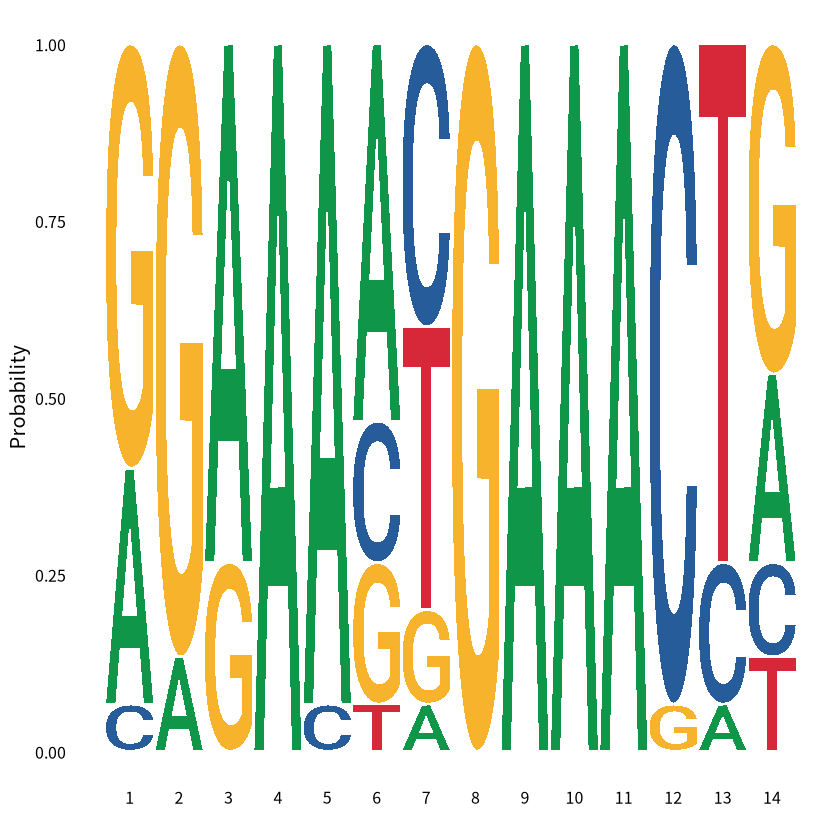

In [11]:
library(ggseqlogo)

pwm <- matrix(c(
 0.333333,  0.066667,  0.600000,  0.000000,
 0.133333,  0.000000,  0.866667,  0.000000,
 0.733333,  0.000000,  0.266667,  0.000000,
 1.000000,  0.000000,  0.000000,  0.000000,
 0.933333,  0.066667,  0.000000,  0.000000,
 0.533333,  0.200000,  0.200000,  0.066667,
 0.066667,  0.400000,  0.133333,  0.400000,
 0.000000,  0.000000,  1.000000,  0.000000,
 1.000000,  0.000000,  0.000000,  0.000000,
 1.000000,  0.000000,  0.000000,  0.000000,
 1.000000,  0.000000,  0.000000,  0.000000,
 0.000000,  0.933333,  0.066667,  0.000000,
 0.066667,  0.200000,  0.000000,  0.733333,
 0.266667,  0.133333,  0.466667,  0.133333
), nrow = 14, byrow = TRUE)

# 转置
pwm <- t(pwm)
rownames(pwm) <- c("A", "C", "G", "T")

# 绘制 motif 图
p <- ggseqlogo(pwm, method = "probability", seq_type = "dna")
p
ggsave('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/SAIGEQTL/Integrative_analysis/FIMO/STAT1.pdf',p)